## Задание, оцениваемое сокурсниками: Центральная предельная теорема своими руками
В этом задании предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

В качестве исследуемого распределения было выбрано [логнормальное распределение](https://ru.wikipedia.org/wiki/Логнормальное_распределение). Сгенерируем из него выборку объёма 1000, построим гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения случайной величины (чтобы величины были в одном масштабе, выставить у гистограммы значение параметра `normed=true`).

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import math
%matplotlib inline

Для формирования выборки из логнормального распределения используется функция из модуля `scipy.stats`, которая называется `lognorm.rvs`.

 У данной функции 4 параметра:
- *s*     - параметр формы распределения (в данном примере = 1),
- *loc*   - параметр сдвига (в данном примере = 0),
- *scale* - параметр масштаба распределения (в данном примере = 1), 
- *size*  - размер (в данном примере = 1000). 

Все непрерывные распределения в scipy.stats используют параметры сдвига и масштаба, даже те, у которых явно параметр сдвига не указывается. Поэтому в данном примере параметр сдвига равен нулю.

In [2]:
mu, sigma = 0., 1.
lognorm = st.lognorm.rvs(s=sigma, loc=mu, scale=math.exp(mu), size=1000)
#lognorm = st.lognorm(s=sigma, loc=0., scale=1.)
#values = lognorm.rvs(size=1000)

Для построения гистограммы используем функцию plt.hist c 25 интервалами.
Для построения графика плотности распределения зададим интервал, соответсвующий интервалу гистограммы и логнормальное распределение с уже знакомыми нам параметрами формы, сдвига и масштаба = 1, 0, $e^\mu$.
Всё это изобразим на одном графике.

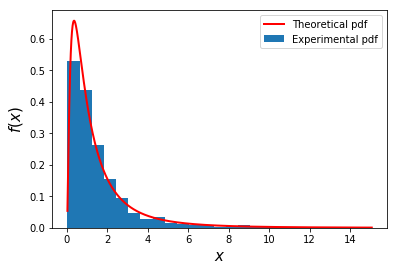

In [3]:
plt.hist(lognorm, 25, normed=True, label='Experimental pdf')
x = np.linspace(min(lognorm), max(lognorm), 1000)

pdfq = st.lognorm(s=sigma, loc=mu, scale=math.exp(mu))
plt.plot(x, pdfq.pdf(x), linewidth=2, color='r', label='Theoretical pdf')
plt.ylabel('$f(x)$', fontsize=15)
plt.xlabel('$x$', fontsize=15)
plt.legend()
plt.show()

Задача — оценить распределение выборочного среднего случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) нужно сгенерировать 1000 выборок объёма n и построить гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (в начале дана ссылка на википедию), посчитать значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних.

**Обратите внимание**: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы рисуется плотность соответствующего нормального распределения (внимательно с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

In [6]:
mean = math.exp(mu + sigma**2 / 2)
variance = (math.exp(sigma**2) - 1) * (math.exp(2 * mu + sigma**2))
print mean, variance

1.6487212707 4.67077427047


Математическое ожидание и дисперсия логнормального распределения считаются по формулам:<br>
$mean = e ^ {\mu + \frac {\sigma ^{2}} 2}$ <br> $variance = (e ^ {{\sigma ^{2}}}-1) e ^{2\mu + \sigma ^{2}}$

In [7]:
# sample_size - объём выборки
def evaluate_distribution(sample_size):
    norm_distribution = st.norm(loc=mean, scale=math.sqrt(variance/sample_size))
    x = np.linspace(0., 8., 100)
    norm_pdf = norm_distribution.pdf(x)
    
    averages = []
    for i in xrange(0, 1000):
        averages.append(np.mean(st.lognorm.rvs(s=sigma, loc=mu, scale=math.exp(mu), size=sample_size)))
    
    plt.hist(averages, 25, normed=True)
    plt.plot(x, norm_pdf)
    plt.ylabel('$f(x)$', fontsize=15)
    plt.xlabel('$x$', fontsize=15)
    plt.show()

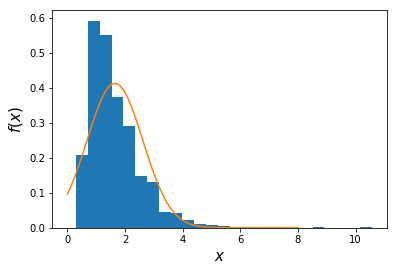

In [8]:
evaluate_distribution(5) # Объем выборки n = 5

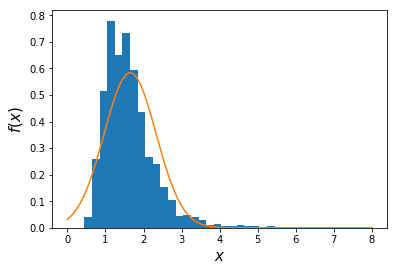

In [9]:
evaluate_distribution(10) # Объем выборки n = 10

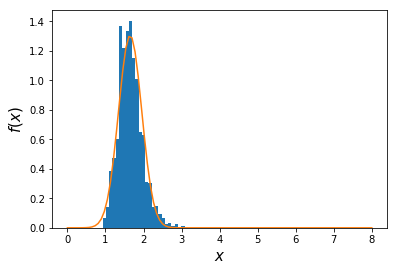

In [10]:
evaluate_distribution(50) # Объем выборки n = 50

**Выводы:**
  Согласно центральной предельной теореме, при больших объёмах выборок логнормальное распределение может быть приближено нормальным распределением:<br>
Из гистограмм и графиков видно, что нормальное распределение даёт очень хорошее приближение к исходному логнормальному распределению.  